### Treaing Outliers

### What is an Outlier?
An outlier is a data point in a data set that is distant from all other observation.
### What is an Extreme Value?
An Extreme value is just a minimum or a maximum, it need not be much different from of the data.

### How can we Identify an outlier?
1-Using Box plots

2-Using Scatter plot

3-Using Z score

### There are Two Methods for Outlier Treatment
1. Interquartile Range(IQR) Method
2. Z Score method

## IQR Method

Data point that falls outside of 1.5 times of an Interquartile range above the 3rd quartile (Q3) and below the 1st quartile (Q1)

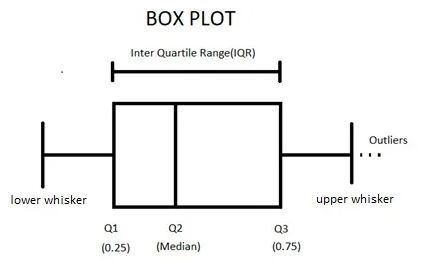

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset('car_crashes')
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
data.shape

(51, 8)

In [4]:
data.isnull().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

#### Lets consider the alcohol column

#### Plotting the box plot for checking outliers

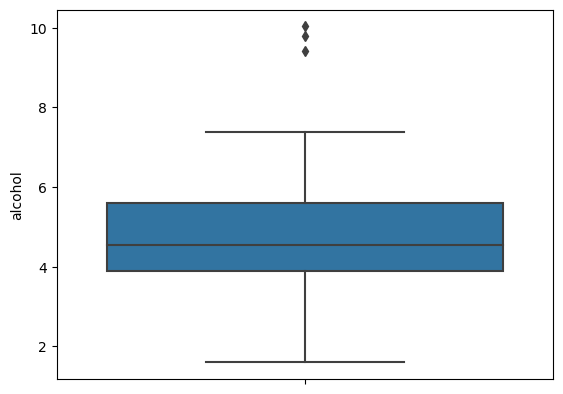

In [5]:
sns.boxplot(data=data, y = 'alcohol');

#### Setting the outlier limits

In [6]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL, LL

In [7]:
UL, LL = outlier_limit(data['alcohol'])
data['alcohol'] = np.where((data['alcohol']>UL) | (data['alcohol']<LL),np.nan,data['alcohol'])

#### Checking the NaN values

In [8]:
data.isnull().sum()

total             0
speeding          0
alcohol           3
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

<li> We can see that there is 3 outliers present in the DataFrame. We have to drop it.

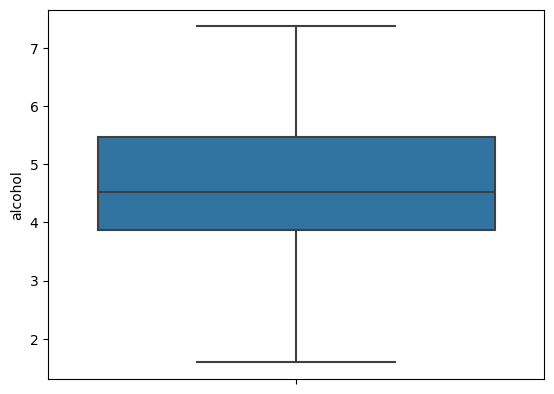

In [9]:
sns.boxplot(data=data, y = 'alcohol');

In [10]:
data.dropna(inplace=True)
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [11]:
data.shape

(48, 8)

### Z Score Method
Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation.